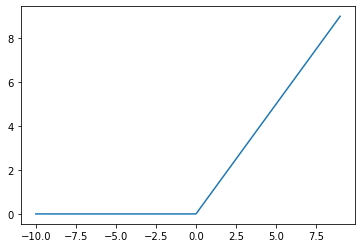

In [1]:
#ReLU Function
#Use a “He Normal” or “He Uniform” weight initialization and scale input data to the range 0-1 (normalize) prior to training.
from matplotlib import pyplot

# rectified linear function
def rectified(x):
	return max(0.0, x)

# define input data
inputs = [x for x in range(-10, 10)]
# calculate outputs
outputs = [rectified(x) for x in inputs]
# plot inputs vs outputs
pyplot.plot(inputs, outputs)
pyplot.show()

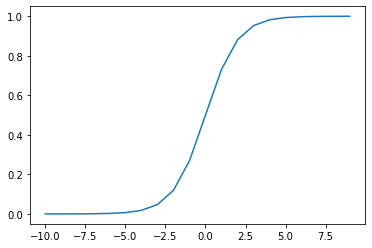

In [2]:
# Sigmoid activation function
#Use “Xavier Normal” or “Xavier Uniform” weight initialization (also referred to Glorot initialization
from math import exp
from matplotlib import pyplot

# sigmoid activation function
def sigmoid(x):
	return 1.0 / (1.0 + exp(-x))

# define input data
inputs = [x for x in range(-10, 10)]
# calculate outputs
outputs = [sigmoid(x) for x in inputs]
# plot inputs vs outputs
pyplot.plot(inputs, outputs)
pyplot.show()

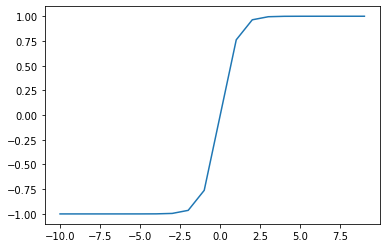

In [3]:
# Tanh activation function
# Use “Xavier Normal” or “Xavier Uniform” weight initialization (also referred to Glorot initialization
from math import exp
from matplotlib import pyplot

# tanh activation function
def tanh(x):
	return (exp(x) - exp(-x)) / (exp(x) + exp(-x))

# define input data
inputs = [x for x in range(-10, 10)]
# calculate outputs
outputs = [tanh(x) for x in inputs]
# plot inputs vs outputs
pyplot.plot(inputs, outputs)
pyplot.show()

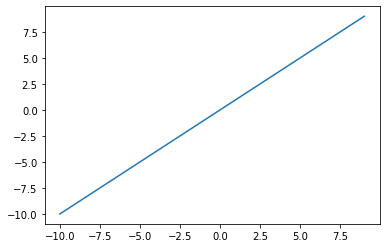

In [4]:
# Linear activation function
from matplotlib import pyplot

# linear activation function
def linear(x):
	return x

# define input data
inputs = [x for x in range(-10, 10)]
# calculate outputs
outputs = [linear(x) for x in inputs]
# plot inputs vs outputs
pyplot.plot(inputs, outputs)
pyplot.show()

In [5]:
from numpy import exp

# Softmax activation function
def softmax(x):
	return exp(x) / exp(x).sum()

# define input data
inputs = [1.0, 3.0, 2.0]
# calculate outputs
outputs = softmax(inputs)
# report the probabilities
print(outputs)
# report the sum of the probabilities
print(outputs.sum())

[0.09003057 0.66524096 0.24472847]
1.0


Train: 0.822, Test: 0.858


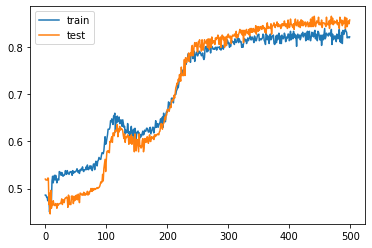

In [6]:
#Vanishing Gradient Problem
# mlp for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
init = RandomUniform(minval=0, maxval=1)
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.674, Test: 0.638


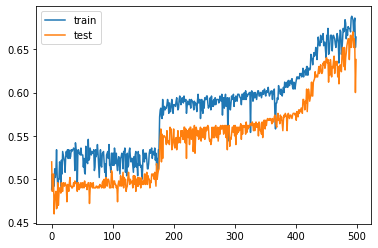

In [7]:
# deeper mlp for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
init = RandomUniform(minval=0, maxval=1)
model = Sequential()
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.838, Test: 0.840


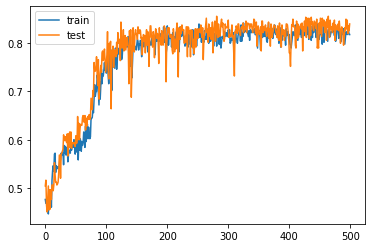

In [8]:
#Using the ReLU function
# deeper mlp with relu for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()